## Group 9 - Homework 3

Team:
- Nupoor Kumbhar - 2351355
- Kunduru Neha Sivatmika - 2351359
- Vamshi Krishna Madhavan - 2344937
- Bala Vamsi Maddineni - 2352004

## Homework Questions

**1. Why is output of in the interval (0, 1)?**



$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

We use the sigmoid function in logistic regression because it's ideal for modeling probabilities, which range from 0 to 1. The sigmoid function transforms any real value into this interval and can represent the odds ratio of an event. The odds ratio is the ratio of an event occurring to not occurring, and it can be any positive real number.

However, we don't use the sigmoid function in the interval (-1, 1) for logistic regression because it lacks a clear interpretation as a probability or odds ratio. This range is essentially a scaled and shifted version of the hyperbolic tangent function, which is used in neural networks for different purposes. The hyperbolic tangent function maps real values to (-1, 1), representing similarity or correlation between vectors, but it doesn't directly relate to probabilities or odds. Plus, it can't be easily inverted to obtain the logit function needed for logistic regression.

Due to mathimatical properties sigmoid is bound between the intervals of [0, 1]. As the sigmoid function behaves like an asymptote in which it can never truly approach these values. As the denominator in the formula acts as a blocking agent for these values. The function can never truly approach 1 as the denominator will always be slightly greater for positive values of x. As for negative values of x, the denominator again will increasingly become greater than the numerator which will create the illusion of appraching 0. Although the value will never be 0 but rather a fraction that is extremely close to 0. Thus bounding the function to this interval range of [0, 1]

**2. Why the output of cannot equal 0 or 1?**

The sigmoid function output cannot be exactly 0 or 1 because the exponential function $e^{-x}$ is never zero or negative for any real value of $x$. Therefore, the denominator of the sigmoid function is always greater than 1, and the numerator is always 1. This means that the sigmoid function is always a fraction between 0 and 1, but never equal to 0 or 1. The sigmoid function approaches 0 as $x$ goes to negative infinity, and approaches 1 as $x$ goes to positive infinity, but never reaches these values.

**3. For what value of z is σ(z) = 0.5?**

To find the value of $ z $ for which $ \sigma(z) = 0.5 $, we can start with the sigmoid function defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Now, we'll set $ \sigma(z) = 0.5 $ and solve for $ z $:

$$
0.5 = \frac{1}{1 + e^{-z}}
$$

To eliminate the fraction, we'll take the reciprocal of both sides:

$$
1 + e^{-z} = 2
$$

$$
e^{-z} = 1
$$

To find the value of $ z $, we can take the natural logarithm $ \ln $ of both sides:

$$
\ln(e^{-z}) = \ln(1)
$$

$$
-z = 0
$$

$$
z = 0
$$

So, for $ \sigma(z) $ to be equal to 0.5, the value of $ z $ is 0.


**4. Show that σ'(z) = σ(z) * (1-σ(z)).**

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The derivative of $ \sigma(z) $ with respect to $ z $, denoted as $ \sigma'(z) $:

$$
\sigma'(z) = \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right)
$$

We can use the chain rule to compute this derivative:

$$
\sigma'(z) = -\frac{1}{(1 + e^{-z})^2} \cdot \frac{d}{dz} (1 + e^{-z})
$$

Now, differentiate $1 + e^{-z}$ with respect to $z$:

$$
\frac{d}{dz} (1 + e^{-z}) = -e^{-z}
$$

Substitute this back into the expression for $ \sigma'(z) $:

$$
\sigma'(z) = -\frac{1}{(1 + e^{-z})^2} \cdot (-e^{-z})
$$

Simplify:

$$
\sigma'(z) = \frac{e^{-z}}{(1 + e^{-z})^2}
$$

Now, we can simplify further by factoring out $e^{-z}$ in the numerator:

$$
\sigma'(z) = \frac{e^{-z}}{(1+e^{-z})^{2}} = \frac{1}{1 + e^{-z}} \cdot ({1 - \frac{1}{1 + e^{-z}}})
$$

We already know that $ \sigma(z) = \frac{1}{1 + e^{-z}} $, so we can substitute this back in:

$$
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
$$



## Logistic Regression - HR dataset
Use HR.csv data set and consider column "left" to be the target variable with "1" meaning the person left the company and "0" meaning that the person did not leave the company.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

df = pd.DataFrame(pd.read_excel("HR_Employee_Data.xlsx"))
df = df.set_index('Emp_Id')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
Emp_Id,,,,,,,,,,
IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, IND02438 to IND11649
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


- investigage using various graphs/chars how given features affect this target variable

/var/folders/8j/spbg8g5d2pq11r_1l99zcgfm0000gn/T/ipykernel_87436/2280703451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


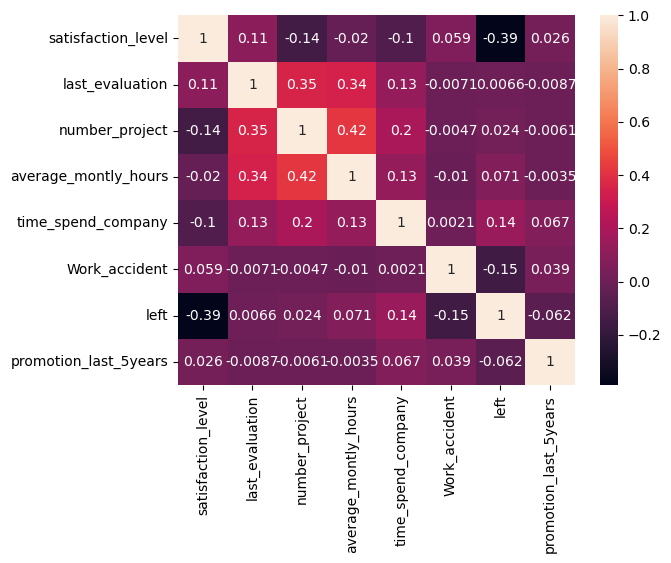

In [5]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

<Axes: xlabel='satisfaction_level', ylabel='Count'>

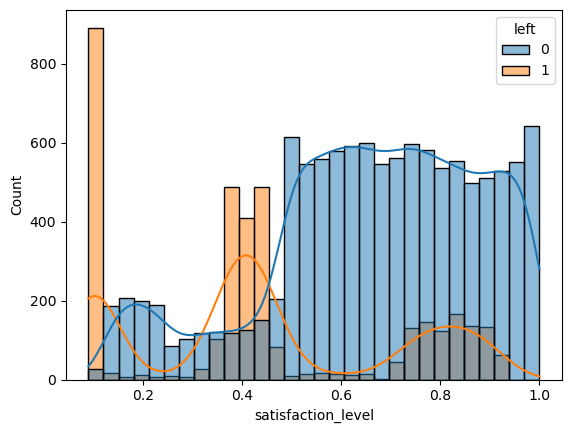

In [6]:
sns.histplot(data=df,x='satisfaction_level',hue='left', kde=True)

<Axes: xlabel='last_evaluation', ylabel='Count'>

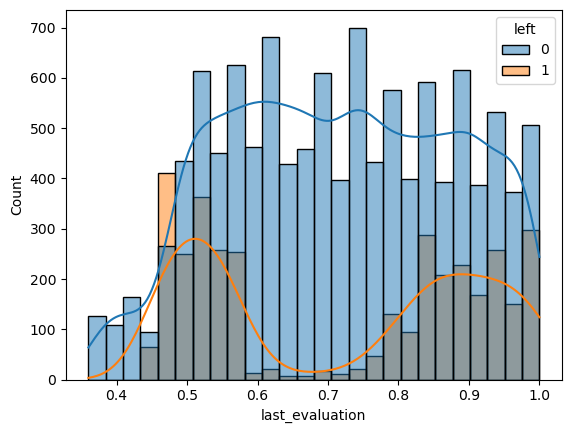

In [7]:
sns.histplot(data=df,x='last_evaluation',hue='left', kde=True)

<Axes: xlabel='Work_accident', ylabel='count'>

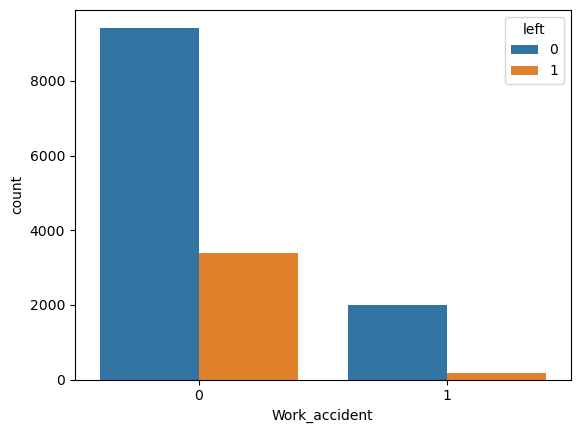

In [8]:
sns.countplot(data=df,x='Work_accident',hue='left')

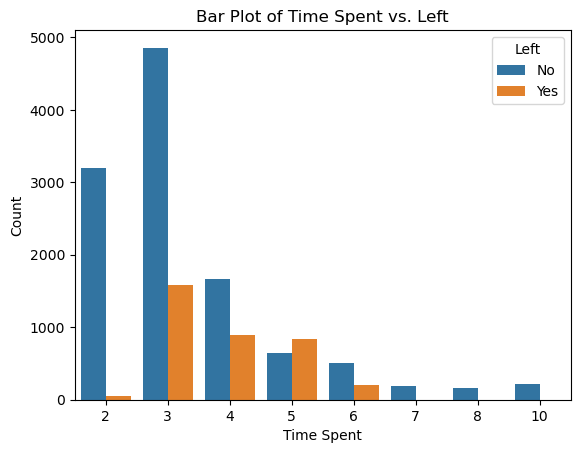

In [9]:
# Relationship between time spend company and left
sns.countplot(x='time_spend_company', hue='left', data=df)
plt.title('Bar Plot of Time Spent vs. Left')
plt.xlabel('Time Spent')
plt.ylabel('Count')
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()


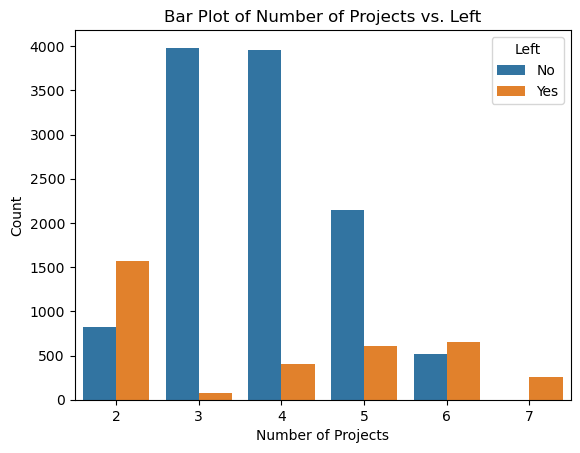

In [10]:
# Relationship between number of projects and left
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Bar Plot of Number of Projects vs. Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()

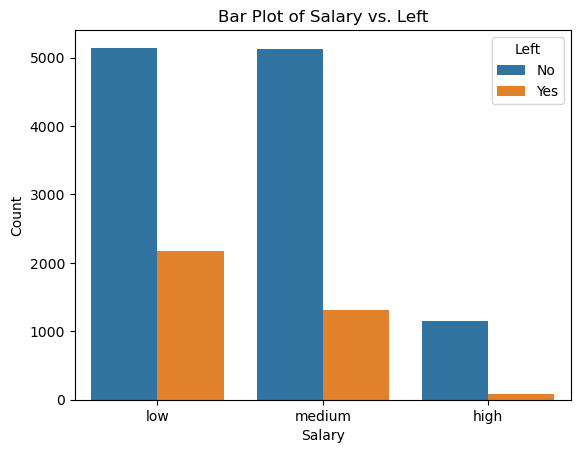

In [11]:
# Relationship between salary and left
sns.countplot(x='salary', hue='left', data=df)
plt.title('Bar Plot of Salary vs. Left')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()


<Axes: xlabel='salary', ylabel='average_montly_hours'>

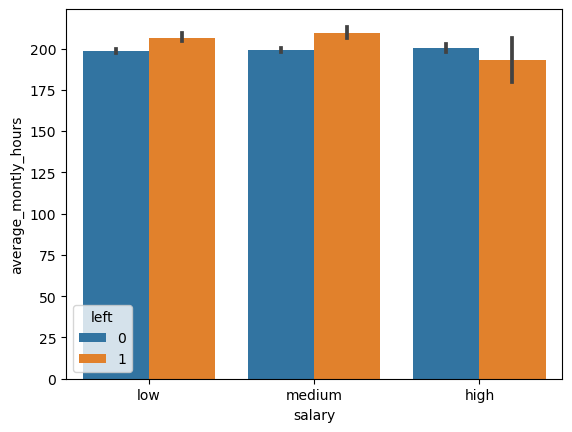

In [12]:
sns.barplot(data=df,x='salary',y='average_montly_hours', hue='left')

<Axes: xlabel='salary', ylabel='promotion_last_5years'>

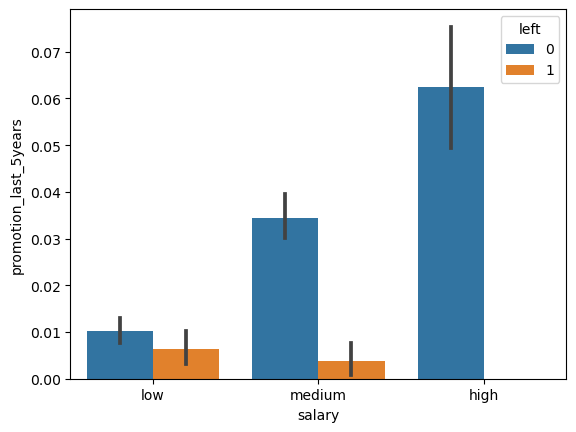

In [13]:
sns.barplot(data=df,x='salary',y='promotion_last_5years', hue='left')

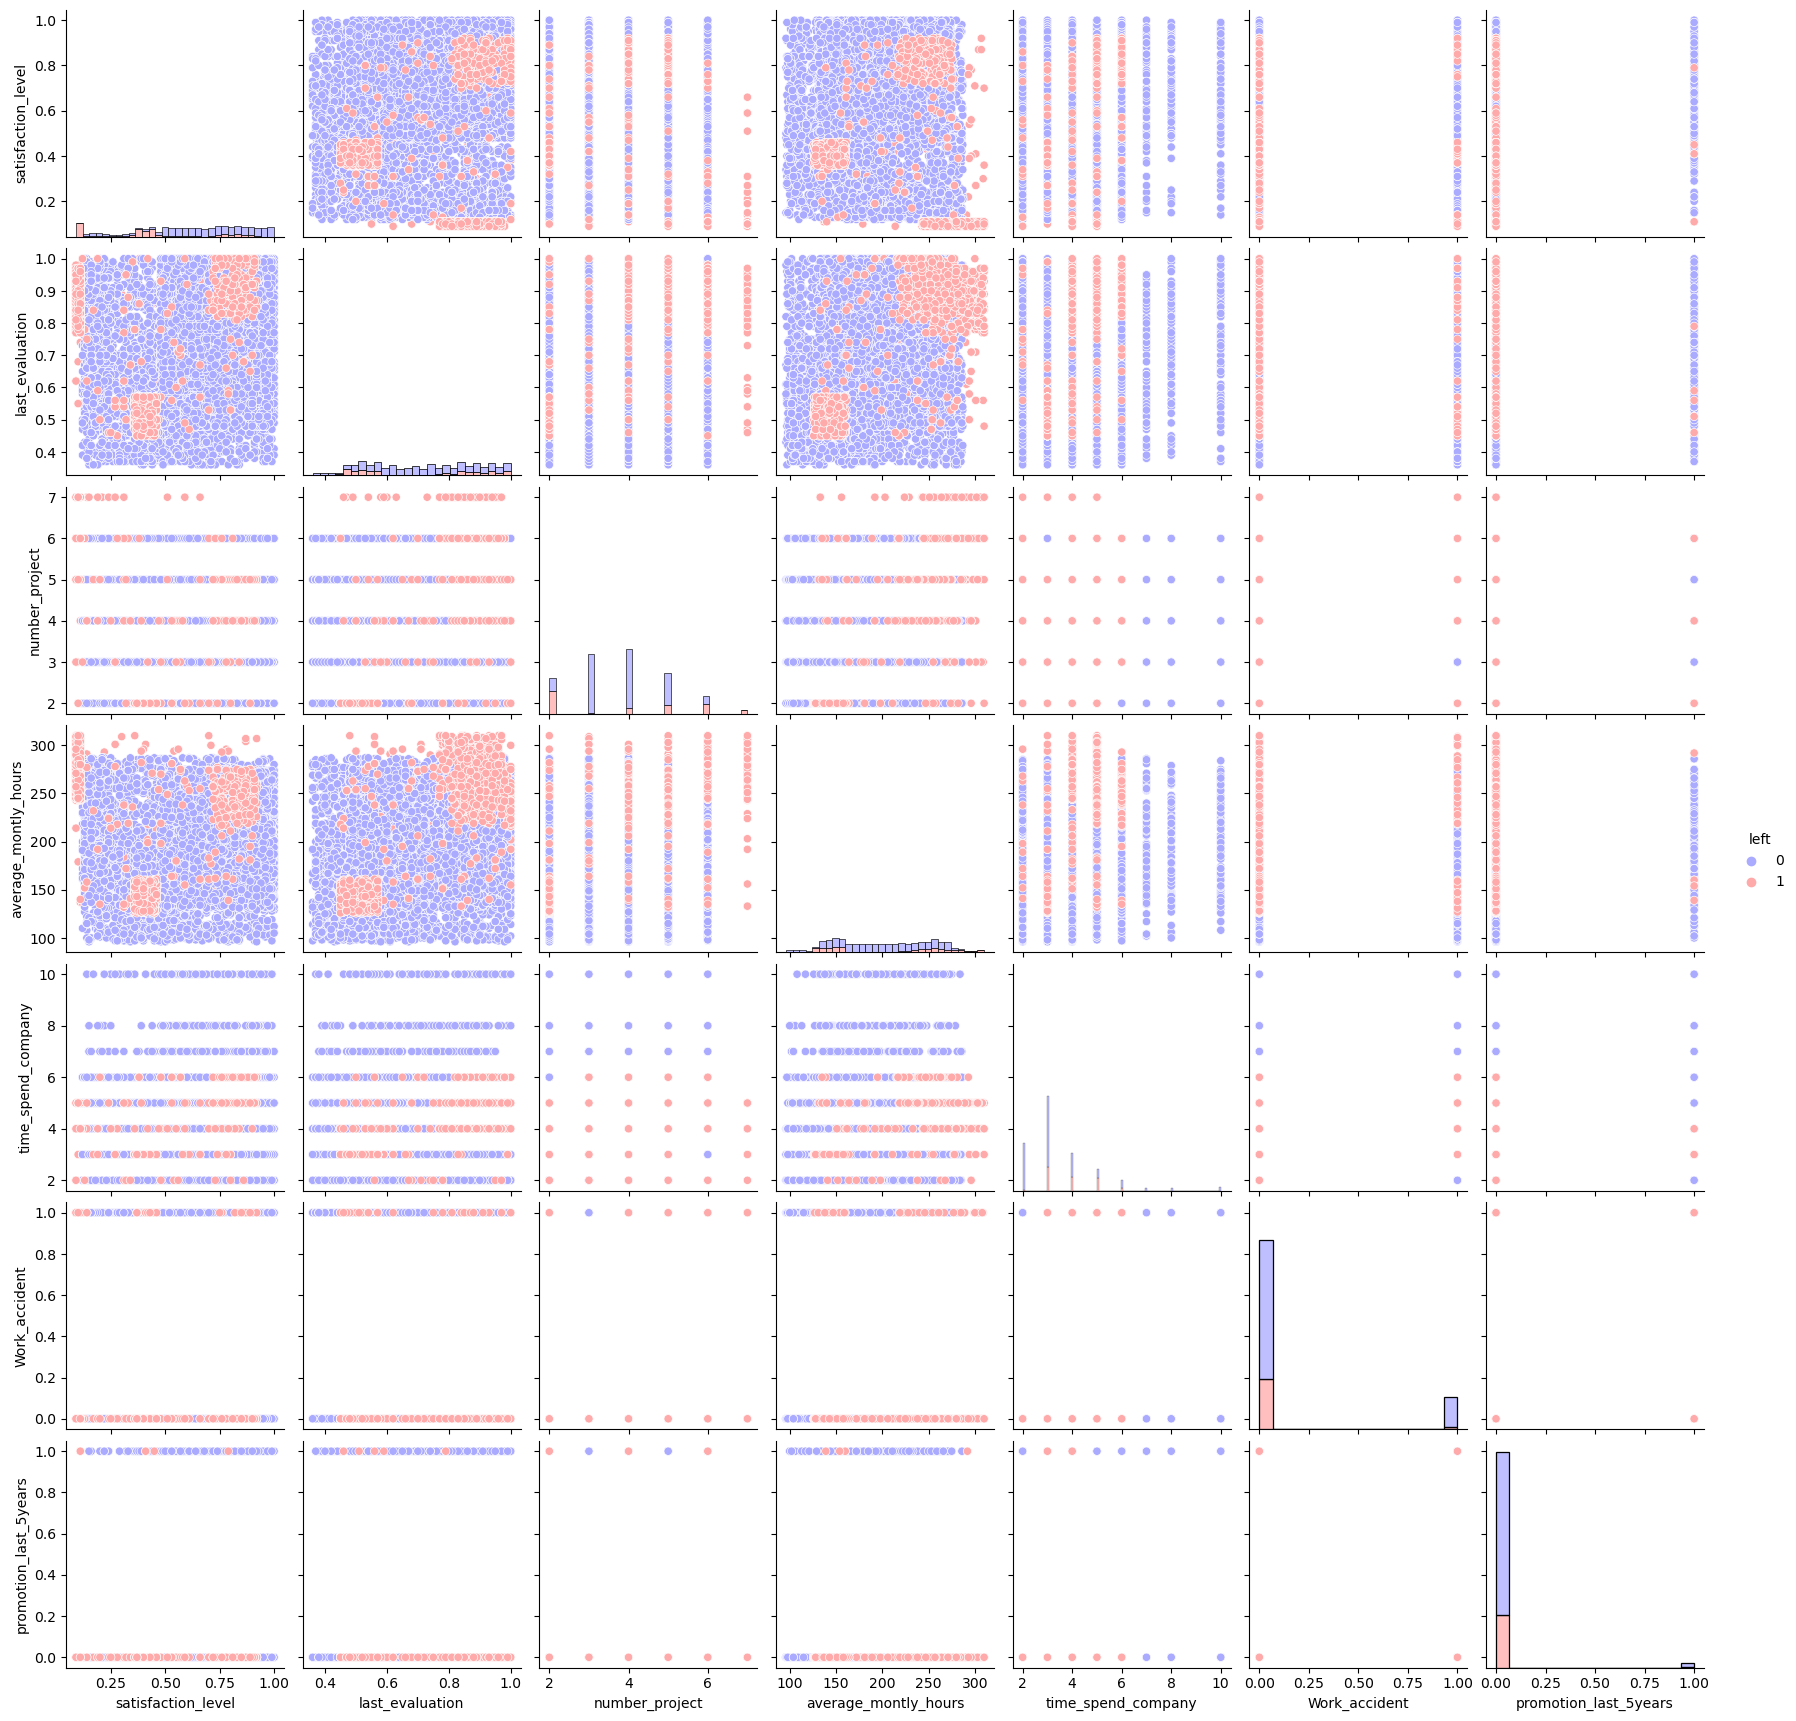

In [14]:
sns.pairplot(df, hue='left',palette='bwr', diag_kind='hist', diag_kws={'multiple':'stack'})

- Choose several features and build the sklearn logistic regression model predicting the target variable "left"

In [15]:
correlations = df.corrwith(df['left'])
print(correlations)

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
dtype: float64


/var/folders/8j/spbg8g5d2pq11r_1l99zcgfm0000gn/T/ipykernel_87436/1548839606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df['left'])


**Categorical Variable Encoding**

In [16]:
departments = pd.unique(df['Department'])
salaries = pd.unique(df['salary'])

print("Department: " + ', '.join(departments))
print("Salary: " + ', '.join(salaries))

Department: sales, accounting, hr, technical, support, management, IT, product_mng, marketing, RandD
Salary: low, medium, high


In [17]:
# For the salary column, we are going to use label encoding due to various values.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])


# For the Department column, we are going to use one-hot encoding.
df_encoded = pd.get_dummies(df, columns=['Department'])
df_encoded.drop(columns=['Department_RandD'], inplace=True)

X = df_encoded.drop('left', axis = 1)
y = df_encoded[['left']]

In [18]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
Emp_Id,,,,,,,,,,,,,,,,,
IND02438,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
IND28133,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
IND07164,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
IND30478,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
IND24003,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0


**Feature Scaling**

In [19]:
# Feature Scaling using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

features_scaler = MinMaxScaler()
X_scaled = features_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
X_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_IT,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Feature Selection**

In [21]:
from sklearn.feature_selection import SelectKBest, chi2
mask = SelectKBest(chi2, k=4).fit(X_scaled, y).get_support()
selected_columns = X_scaled.columns[mask]

print("Selected Columns:")
print(selected_columns)

selected_features = X_scaled[selected_columns]

Selected Columns:
Index(['satisfaction_level', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train1, X_test1, y_train1, y_test1 = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Logistic Regression using scikit-learn
log_reg1 = LogisticRegression()
log_reg1.fit(X_train1, y_train1)
y_pred1 = log_reg1.predict(X_test1)

/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression using scikit-learn
log_reg2 = LogisticRegression()
log_reg2.fit(X_train2, y_train2)
y_pred2 = log_reg2.predict(X_test2)

/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have identified four key predictor variables with chi-square, namely 'satisfaction_level,' 'Work_accident,' 'promotion_last_5years,' and 'salary_low,' which we believe are instrumental in forecasting the target variable 'left.'

- Discuss the model performance (the confusion matrix and the classification report) on the test set.


In [24]:
print(f'Training Score for scaled feature selected chi2: {log_reg1.score(X_train1, y_train1)} \n')
print(f'Training Score for full scaled dataset: {log_reg2.score(X_train2, y_train2)} \n')

Training Score for scaled feature selected chi2: 0.7667305608800733 

Training Score for full scaled dataset: 0.7672306025502125 



In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test1, y_pred1))

print(confusion_matrix(y_test2, y_pred2))

[[2095  199]
 [ 541  165]]
[[2109  185]
 [ 546  160]]


In [26]:
from sklearn.metrics import classification_report

print("Classification Report for ")
print(classification_report(y_test1, y_pred1))
print("Classification Report for ")
print(classification_report(y_test2, y_pred2))

Classification Report for 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.23      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000

Classification Report for 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.46      0.23      0.30       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



**Logistic Regression without scaling**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'Training Score: {reg.score(X_train, y_train)} \n')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Score: 0.7693974497874823 

[[2114  180]
 [ 544  162]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000



/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
mask = SelectKBest(chi2, k=4).fit(X, y).get_support()
selected_columns = X.columns[mask]

print("Selected Columns:")
print(selected_columns)

selected_features = X[selected_columns]

Selected Columns:
Index(['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident'],
      dtype='object')


In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'Training Score: {reg.score(X_train, y_train)} \n')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Score: 0.7686473872822736 

[[2096  198]
 [ 538  168]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2294
           1       0.46      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.63      0.58      0.58      3000
weighted avg       0.72      0.75      0.72      3000



/Users/test/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Observations

We ran 4 different models to see the difference certain techniques would make on the accuracy of the model. The techniques we did on the models are in this order:
* 1st, used chi squared to find the best features in the dataset that is MinMax scaled
* 2nd, used all features in the MinMax scaled dataset
* 3rd, used all features in a unscaled dataset
* 4th, used features selected by chi squared on a unscaled dataset

Across all 4 models we didnt really see much of a difference between the accuracys. They all lingered around the same values with a very small deviation. However, we did notice that using more features rather than the best selected features lead to a better accuracy. Additionally, due to the type of model that was being used, scaling the dataset did not offer much in terms for performance.

Overall, the best model we created would be tied between: all features scaled using MinMax scaler, or all features unscaled. Both yielded similar results which produced a testing accuracy of 76%.